# George Washington [Something, something, Title here]

Kat Canavan and Phillip Post


First, import libraries/ packages:

In [2]:
import pandas as pd

import plotly.express as px

from geopy.geocoders import Nominatim

import time

##### (Optional) uncomment the following cell to run data collection

In [1]:
import find_a_grave_scraper as scraper

try:
    data = pd.read_csv('Scraper_Data.csv')

except:
    data = scraper.get_info()
    
    print(len(data))

    data.to_csv('Scraper_Data.csv')

scraper.get_long_lat(data).to_csv('Scraper_Data_Long_Lat.csv')


1569
104
118
197
283
419
431
575
631
632
636
660
667
680
836
875
1006
1035
1097
1101
1103
1203
1206
1221
1240
1241
1310
1326
1351
1353
1361
1370
1408
1491
1544
1546
1566
1605
1679
1680


### Section title here

For the purpose of this notebook (so that we don't tax findagrave.com's servers) we're going to use a csv file we already prepared with the code above. Now we need to unpack that file back into a data frame.
Note: If you want to run the rest of the worksheet with your own data from the previous cell, change the name of the file here to "Scraper_Data.csv".

In [2]:
dataframe = pd.read_csv('George_Washingtons.csv')

## Plots!

### Trends in Births of George Washingtons Over Time

array([[<AxesSubplot:title={'center':'Birth Year'}>]], dtype=object)

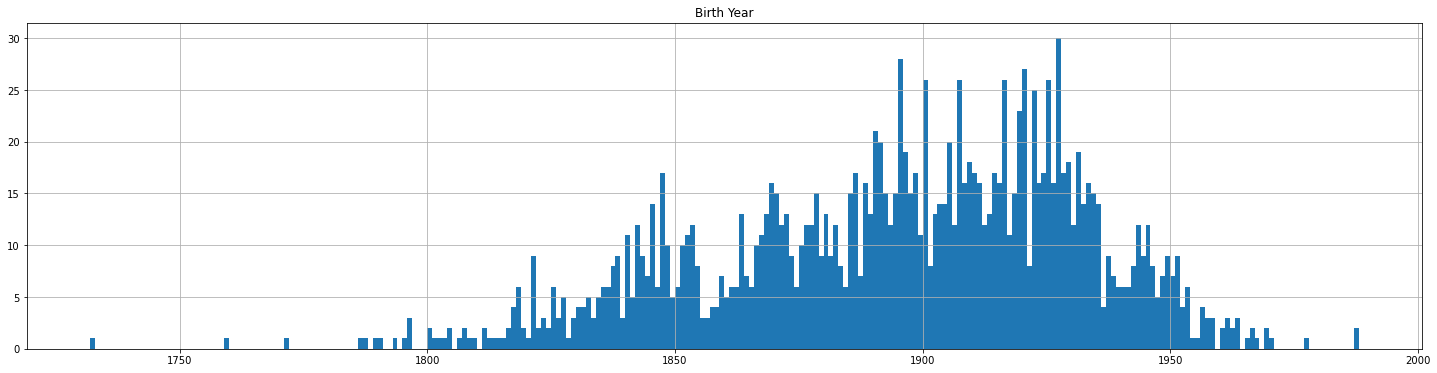

In [36]:
# Frequency of births of George Washingtons

# each year should be represented on the chart so subtract the min year from max
# year to get the range
year_range = (dataframe['Birth Year'].max()) - (dataframe['Birth Year'].min())

# plot a histogram to represent the number of births per year
dataframe.hist(column='Birth Year', bins=year_range, figsize=(25,6))

### Trends in Deaths of George Washingtons with Name Over Time

array([[<AxesSubplot:title={'center':'Death Year'}>]], dtype=object)

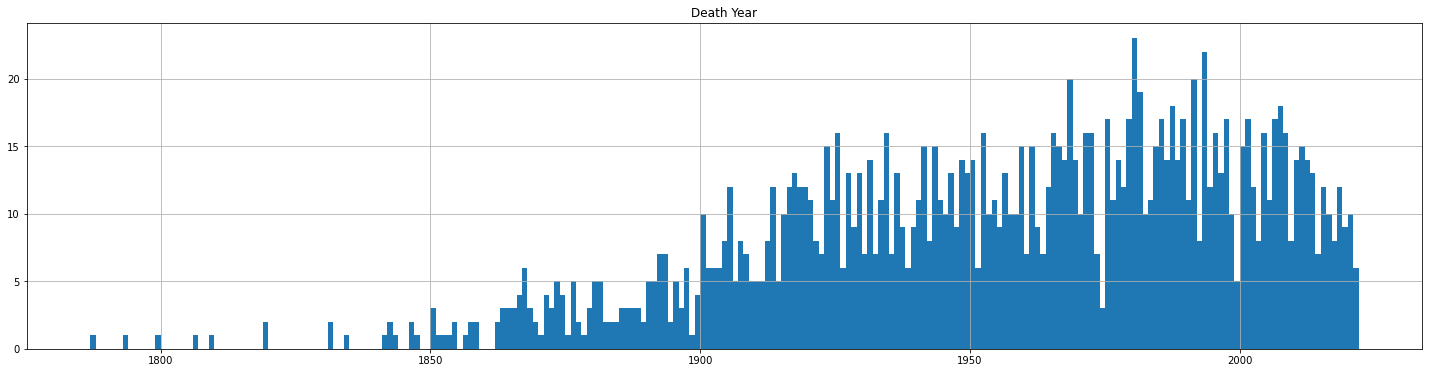

In [32]:
# Frequency of deaths of George Washingtons


# each year should be represented on the chart so subtract the min year from max
# year to get the range
year_range = (dataframe['Death Year'].max()) - (dataframe['Death Year'].min())

# plot a histogram to represent the number of deaths per year
dataframe.hist(column='Death Year', bins=year_range, figsize=(25,6))

### Trends in Lifespan for George Washingtons

### Convert the Addresses to Longitude and Latitude

In [ ]:
def get_long_lat(data_table):
    #iterate through the dataframe for longitude and latitude
    for i, row in data_table.iterrows():
        locator = Nominatim(user_agent="Jane is a good coder")
        try:
            location = locator.geocode(row["Location of Grave"])

            data_table["Longitude"][i] = location.longitude

            data_table["Latitude"][i] = location.latitude

            time.sleep(1.01)
        except:
            # If the geolocator does not accept the address, move on
            continue
    return data_table

### Trends in location of George Washington Graves

In [7]:
df = pd.read_csv("Scraper_Data_Long_Lat.csv")

fig = px.scatter_geo(df, lat = "Latitude", lon = "Longitude", hover_name= "Location of Grave")
fig.show()


As expected, the vast majority of graves with the name George Washington (GW) were located within the United States. With Oceania and Europe being home to the second and third highest density of GW Graves, respectively. With GW being an American name, it is understandable that the USA would be home to the highest density, especially when considering its historical significance.

While this outcome was expected it is important to note some shortcomings with it. Findagrave.com is only in english and is mainly used by Americans; therefore, there are probably many more graves with the name GWoutside of the United States that have not been noted. These results are far from definitive but do provide a decent representation where GW graves are generally concentrated.

In [8]:
fig = px.scatter_geo(df, lat = "Latitude", lon = "Longitude", hover_name= "Location of Grave", scope = "usa")
fig.show()

Now, if we take a closer look at only the United States, some interesting trends in GW graves present themselves. Most unexpectedly, there seems to be an invisible line from Minnesota to Texas, where there is a notable drop in graves to the west compared to the east. At first, it was believed that this may be due to some geological feature that could cause this separation, but the closest matching feature is the Louisiana river which is further east. Our best assumption is that the location of graves are following general population density trends and thus are sparse through the low population density of the great plains. This would explain the uptick in uptick in GW graves when we reach the west coast, which is mostly urbanized.

Unsurprisingly, the state with the highest density of George Washington graves is Virginia. Virginia is the original home of George Washington and is right next to the capitol of the United States in the District of Columbia. Children are often named after notable celebrities, especially if they are local. Therefore, there is plentiful historical reasoning behind the concentration of graves named GW in Virginia.